<a href="https://colab.research.google.com/github/kganesh1999/movie_recommender_system/blob/main/recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content Based Filtering

Content-based filtering recommends items that are similar to the ones the user liked in the past. It differs from collaborative filtering, however, by deriving the similarity between items based on their content (e.g. title, year, description) and not how people use them.In content-based filtering, rich information describing each item is assumed to be available in the form of a feature vector (y) (e.g. title, year, description). These feature vectors are used to create a model of the user’s preferences. A variety of information retrieval (e.g. tf-idf) and machine learning techniques (e.g. Naive Bayes, support vector machines, decision trees, etc) can be used to generate a user model based on which recommendations can be generated.

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


TF-IDF is a class of techniques where similarity between queries and documents is measured via the sum of term frequency-like numbers (TFs) multiplied by terms' importance. The term importance is frequently expressed via the IDF (the inverse document frequency frequency tf–idf, actually it is the logarithm of IDF that is used in practice) .

Typically, the more frequently the term occur in a document the larger is the TF coefficient. It is the reverse for the term importance coefficients, which are larger for terms that occur in fewer documents, i.e., more important. Thus, to compute TF*IDF, you need to know the number of term occurrences.

In [4]:
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
movies['genres'] = movies['genres'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(movies['genres'])
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)


Cosine similarity
For calculating distances, cosine similarity is a measure of similarity between two non-zero vectors of an inner product space
that measures the cosine of the angle between them. Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is
represented using a dot product and magnitude.
We will use cosine distance here. Here we are insterested in similarity. That means higher the value more similar they are. But
as the function gives us the distance, we will deduct it from 1.
Here, genres of movie are considered as an important parameter to recommend user the movie which one already watched.


In [5]:
cosine_sim_movies

array([[1.        , 0.80403568, 0.15641664, ..., 0.        , 0.26646851,
        0.        ],
       [0.80403568, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15641664, 0.        , 1.        , ..., 0.        , 0.58699859,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.26646851, 0.        , 0.58699859, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [6]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
    # Get the index of the movie that matches the title
    idx_movie = movies.loc[movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:3]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 2 most similar movies
    return movies['title'].iloc[movie_indices]

In [7]:
get_recommendations_based_on_genres("Jumanji (1995)")

56     Indian in the Cupboard, The (1995)
114     NeverEnding Story III, The (1994)
Name: title, dtype: object

Recommendation for user with ID-1

In [8]:
def get_recommendation_content_model(userId):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
    :return: Titles of movies recommended to user
    """
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = ratings[ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((movies["title"][row["movieId"]==movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)
get_recommendation_content_model(1)

{'Adventures in Babysitting (1987)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Before the Rain (Pred dozhdot) (1994)',
 "Bill & Ted's Bogus Journey (1991)",
 'Body Snatchers (1993)',
 'Die Hard: With a Vengeance (1995)',
 'Dragonheart (1996)',
 'Dreamcatcher (2003)',
 'Dune (1984)',
 'Escape from L.A. (1996)',
 'Go West (1925)',
 'Independence Day (a.k.a. ID4) (1996)',
 'King Kong Lives (1986)',
 'Man in the Iron Mask, The (1998)',
 'MisÃ©rables, Les (1995)',
 "Mr. Toad's Wild Ride (a.k.a. The Wind in the Willows) (1996)",
 'Navigator: A Mediaeval Odyssey, The (1988)',
 'Othello (1995)',
 'Safe (1995)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Stargate (1994)',
 'Street Fighter (1994)',
 'Tales from the Darkside: The Movie (1990)',
 'Three Caballeros, The (1945)',
 'Tie That Binds, The (1995)',
 'Toy Story 2 (1999)',
 'Twilight Saga: New Moon, The (2009)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Winnie the Pooh and the Blustery Day (1968)

## Model evaluation with KNN

The model is evaluated on based of if there is exact match of genres with the genres of movie which is already watch by user.
To begin with evaluation, KNN model is used on dataset. The following function is hard coded to check accuracy. The model is
evaluated by cross-checking actual genre with predicted genre.


In [9]:
from sklearn.neighbors import KNeighborsClassifier  
def get_movie_label(movie_id):
    """
    Get the cluster label to which movie belongs by KNN algorithm.  
    :param movie_id: movie id
    :return: genres label to movie belong
    """
    classifier = KNeighborsClassifier(n_neighbors=5)
    x= tfidf_movies_genres_matrix
    y = movies.iloc[:,-1]
    classifier.fit(x, y)
    y_pred = classifier.predict(tfidf_movies_genres_matrix[movie_id])
    return y_pred

In [10]:
true_count = 0
false_count = 0
def evaluate_content_based_model():
    """
    Evaluate content based model.  
    """
    for key, colums in movies.iterrows():
        movies_recommended_by_model = get_recommendations_based_on_genres(colums["title"])
        predicted_genres  = get_movie_label(movies_recommended_by_model.index)
        for predicted_genre in predicted_genres:
            global true_count, false_count
            if predicted_genre == colums["genres"]:
                true_count = true_count+1
            else:
#                 print(colums["genres"])
#                 print(predicted_genre)
                false_count = false_count +1
evaluate_content_based_model()
total = true_count + false_count
print("Accuracy:"+ str(true_count/total))
print("Misprediction rate:" + str(false_count/total))

Accuracy:0.9324383561643835
Misprediction rate:0.06756164383561644


*** Limitation of Content-based filtering ***

The model purely depends on existing interest of users. In addition, it has limited ability to expand recommending contents
from various genres. Hence, there is a need for advanced filtering model for recommendation.


# Collabrative Filtering

Collaborative filtering is a set of technologies that predict which items in a set of products (or information) a particular customer will like based on the preferences of lots of other people.

Let’s take the simple example of recommending movies.

If I know your movie preferences, and those of lots of other people, I can make pretty good movie recommendations for you.

A simple solution would be to just recommend whatever is most popular. That would be collaborative, but it wouldn’t be personalized, and wouldn’t work well if you don’t have mainstream tastes.

The original collaborative filtering systems took your past preferences (the movies you liked) and used them to identify other people who had similar movie tastes. Once you have these people identified, I can find the movies this “neighborhood” likes and recommend them to you. It works quite well if we have enough people, and their tastes are reasonably consistent.

Over time, people have developed more sophisticated ways of computing essentially the same thing. In most of today’s algorithms instead of building a list of neighbors for you, we use everyone’s ratings to form some type of intermediate representation of movie tastes — something like a taste space in which we can place you, and the movies — and then then use that representation to quickly evaluate movies to see if they match this community-based representation of your tastes.

In [11]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

## Item-Item Filtering
Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems
based on the similarity between items calculated using people's ratings of those items.


### Implementation of Item-Item Filtering

In [12]:
movies_ratings=pd.merge(movies, ratings)

In [13]:
movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [14]:
#Pivoting data with movieID and user's rating on them
ratings_matrix_items = movies_ratings.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratings_matrix_items.fillna( 0, inplace = True )
print('The dimension of matrix is',ratings_matrix_items.shape)
ratings_matrix_items.head()

The dimension of matrix is (9066, 671)


userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,3.5,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
movie_similarity = 1 - pairwise_distances(ratings_matrix_items.values, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9026,9027,9028,9029,9030,9031,9032,9033,9034,9035,9036,9037,9038,9039,9040,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050,9051,9052,9053,9054,9055,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
0,0.000000,0.394511,0.306516,0.133614,0.245102,0.377086,0.278629,0.063031,0.117499,0.310689,0.328194,0.189994,0.146473,0.190222,0.170197,0.323016,0.349109,0.185447,0.304818,0.069941,0.330460,0.178615,0.126226,0.136525,0.343095,0.124661,0.083653,0.169978,0.258917,0.137337,0.109389,0.489275,0.484232,0.113921,0.358201,0.045398,0.095839,0.378537,0.117677,0.157052,...,0.031902,0.000000,0.055829,0.061899,0.069025,0.079755,0.031902,0.102210,0.079755,0.031902,0.081030,0.000000,0.031902,0.000000,0.010088,0.079755,0.031902,0.031902,0.076528,0.031902,0.031902,0.031902,0.059610,0.079755,0.085111,0.031902,0.031902,0.063804,0.055829,0.055829,0.055829,0.031902,0.079755,0.079755,0.079755,0.079755,0.079755,0.0,0.0,0.055829
1,0.394511,0.000000,0.217492,0.164651,0.278476,0.222003,0.207299,0.223524,0.113669,0.418124,0.293312,0.079558,0.219004,0.055918,0.165269,0.237198,0.223396,0.092847,0.420750,0.189806,0.287743,0.255670,0.174576,0.177014,0.203398,0.044192,0.142698,0.106068,0.171252,0.075484,0.218125,0.321346,0.366372,0.102839,0.225403,0.104427,0.078320,0.351724,0.000000,0.070863,...,0.055038,0.000000,0.000000,0.080092,0.036243,0.068797,0.055038,0.129460,0.082557,0.055038,0.088018,0.110076,0.055038,0.137594,0.017404,0.068797,0.055038,0.055038,0.086723,0.055038,0.055038,0.055038,0.102839,0.082557,0.146835,0.055038,0.055038,0.000000,0.000000,0.000000,0.000000,0.055038,0.068797,0.082557,0.082557,0.137594,0.068797,0.0,0.0,0.000000
2,0.306516,0.217492,0.000000,0.177012,0.370732,0.247499,0.435648,0.127574,0.306717,0.191255,0.220983,0.182194,0.111808,0.244043,0.155901,0.192242,0.226681,0.178096,0.208704,0.140288,0.166740,0.204972,0.179210,0.018933,0.254918,0.103690,0.123276,0.035136,0.038067,0.097413,0.148310,0.270095,0.139225,0.057912,0.215727,0.000000,0.122513,0.186139,0.000000,0.146710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116226,0.116226,0.000000,0.000000,0.0,0.0,0.000000
3,0.133614,0.164651,0.177012,0.000000,0.179556,0.072518,0.184626,0.501513,0.254630,0.111447,0.152753,0.000000,0.133192,0.082895,0.026531,0.098929,0.095295,0.013764,0.048416,0.225098,0.180602,0.080957,0.021566,0.120697,0.093818,0.000000,0.000000,0.000000,0.118419,0.000000,0.015329,0.091049,0.088660,0.171649,0.104829,0.000000,0.000000,0.191105,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.245102,0.278476,0.370732,0.179556,0.000000,0.272645,0.388476,0.194113,0.367941,0.246846,0.293352,0.187843,0.164968,0.172188,0.081467,0.169367,0.252014,0.108283,0.251421,0.141337,0.171056,0.197865,0.171398,0.122501,0.248038,0.156720,0.115785,0.057359,0.042400,0.080847,0.145366,0.226915,0.224845,0.048954,0.283303,0.074564,0.124274,0.260779,0.000000,0.112111,...,0.176845,0.117897,0.000000,0.042891,0.116453,0.000000,0.176845,0.057376,0.117897,0.176845,0.116453,0.000000,0.176845,0.000000,0.055923,0.000000,0.176845,0.176845,0.133089,0.176845,0.176845,0.176845,0.000000,0.117897,0.042891,0.176845,0.176845,0.000000,0.000000,0.000000,0.000000,0.176845,0.000000,0.117897,0.117897,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

The following function takes the movie name as a input and will find the movies which are similar to this movie. This function first
find the index of movie in movies frame and then take the similarity of movie and align in movies dataframe so that we can get
the similarity of the movie with all other movies.


In [16]:
def item_similarity(movieName): 
    """
    recomendates similar movies
   :param data: name of the movie 
   """
    try:
        #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
        user_inp=movieName
        inp=movies[movies['title']==user_inp].index.tolist()
        inp=inp[0]

        movies['similarity'] = ratings_matrix_items.iloc[inp]
        movies.columns = ['movie_id', 'title', 'release_date','similarity']
    except:
        print("Sorry, the movie is not in the database!")

The user id of the user for whom we are recommending movies is entered here. Then we look for movies that the consumer
for whom we want to recommend movies has given a rating of 5 or 4.5. We are finding this because as we know that in ItemItem similarity approach we recommended movies to the user based on his previous selection. So, in order to improve our
algorithm, we are looking for movies that the user m enjoys.


In [17]:
def recommendedMoviesAsperItemSimilarity(user_id):
    """
     Recommending movie which user hasn't watched as per Item Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user_movie= movies_ratings[(movies_ratings.userId==user_id) & movies_ratings.rating.isin([5,4.5])][['title']]
    user_movie=user_movie.iloc[0,0]
    item_similarity(user_movie)
    sorted_movies_as_per_userChoice=movies.sort_values( ["similarity"], ascending = False )
    sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0.5]['movie_id']
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    user2Movies= ratings[ratings['userId']== user_id]['movieId']
    for movieId in sorted_movies_as_per_userChoice:
            if movieId not in user2Movies:
                df_new= ratings[(ratings.movieId==movieId)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])
            best10=df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
    return best10['movieId']

In [ ]:
def movieIdToTitle(listMovieIDs):
    """
     Converting movieId to titles
    :param user_id: List of movies
    :return: movie titles
    """
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(movies[movies['movie_id']==id]['title'])
    return movie_titles

In [18]:
user_id=50
print("Recommended movies,:\n",movieIdToTitle(recommendedMoviesAsperItemSimilarity(user_id)))

NameError: ignored

### User-Item Filtering

The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on
an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. Here we find look
alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very
effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore,
for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.


### Implementation
In similar way as we did for ItemItem similarity we will create a matrix but here we will keep rows as user and columns as
movieId as we want a vector of different users. Then in similar ways we will find distance and similarity between users.

In [ ]:
ratings_matrix_users = movies_ratings.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)
ratings_matrix_users.fillna( 0, inplace = True )
movie_similarity = 1 - pairwise_distances( ratings_matrix_users.values, metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_users = pd.DataFrame( movie_similarity )
print('The dimension of matrix is',ratings_matrix_users.shape)
ratings_matrix_users.head()

#### Finding most similar user for each users

Here now we have similarity of users in colums with respective users in row. So if we find maximum value in a column we will
get the user with highest similarity. So now we can have a pair of users which are similar.

In [ ]:
similar_user_series= ratings_matrix_users.idxmax(axis=1)
df_similar_user= similar_user_series.to_frame()

In [ ]:
df_similar_user.columns=['similarUser']

In [ ]:
df_similar_user

Below function takes id of the user to whom we have to recommend movies. On basis of that, we find the user which is similar
to that user and then filter the movies which are highly rated by the user to recommend them to given user.


In [ ]:
movieId_recommended=list()
def getRecommendedMoviesAsperUserSimilarity(userId):
    """
     Recommending movies which user hasn't watched as per User Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user2Movies= ratings[ratings['userId']== userId]['movieId']
    sim_user=df_similar_user.iloc[0,0]
    df_recommended=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
    for movieId in ratings[ratings['userId']== sim_user]['movieId']:
        if movieId not in user2Movies:
            df_new= movies_ratings[(movies_ratings.userId==sim_user) & (movies_ratings.movieId==movieId)]
            df_recommended=pd.concat([df_recommended,df_new])
        best10=df_recommended.sort_values(['rating'], ascending = False )[1:10]  
    return best10['movieId']

In [ ]:
user_id=8
recommend_movies= movieIdToTitle(getRecommendedMoviesAsperUserSimilarity(user_id))
print("Recommended movies for user_id",user_id,"are:\n")
print(recommend_movies)

In [ ]:
recommend_movies[8]

### Evaluating the model

In [ ]:
def get_user_similar_movies( user1, user2 ):
    
    """
     Returning common movies and ratings of same for both the users
    :param user1,user2: user ids of 2 users need to compare
    :return: movieIds to user 
    """
    common_movies = movies_ratings[movies_ratings.userId == user1].merge(
      movies_ratings[movies_ratings.userId == user2],
      on = "movieId",
      how = "inner" )
    common_movies.drop(['movieId','genres_x','genres_y', 'timestamp_x','timestamp_y','title_y'],axis=1,inplace=True)
    return common_movies

In [ ]:
get_user_similar_movies(587,511)

,title_x,userId_x,rating_x,userId_y,rating_y
0,Leaving Las Vegas (1995),587,4.0,511,4.0
1,"Usual Suspects, The (1995)",587,4.5,511,5.0
2,"Postman, The (Postino, Il) (1994)",587,4.5,511,5.0
3,Taxi Driver (1976),587,4.0,511,5.0
4,Flirting With Disaster (1996),587,4.5,511,3.0
5,Apollo 13 (1995),587,4.5,511,4.0
6,Dumb & Dumber (Dumb and Dumber) (1994),587,0.5,511,3.0
7,Hoop Dreams (1994),587,5.0,511,5.0
8,Pulp Fiction (1994),587,3.5,511,5.0
9,"Shawshank Redemption, The (1994)",587,4.5,511,5.0


Limitations with User similarity
1. The challenge with calculating user similarity is the user need to have some prior purchases and should have rated
them.This recommendation technique does not work for new users.
2. The system need to wait until the user make some purchases and rates them. Only then similar users can be found and
recommendations can be made. This is called cold start problem.


### Model-Based Collaborative Filtering

Model-based Collaborative Filtering is based on matrix factorization (MF) which has received greater exposure, mainly as an
unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely
used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:
The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features
that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of
users and items. When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can
restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank
matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as
possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.


#### Matrix Factorization filtering
Mathematics concepts used in this recommender system model.
1. Linear Algebra
2. Matrix Decomposition
3. Dimensional Reducation
Data reduction
A typical machine learning problem might have several hundred or more variables, while many machine learning algorithms
will break down if presented with more than a few dozen. This makes singular value decomposition indispensable in ML for
variable reduction.
Matrix decomposition concept (SVD) with a reduced number of singular values can closely approximate a matrix. This can be
used for data compression by storing the truncated forms of orthogonal matrix 'U' and 'V' and diagonal matrix 'S' in place of A
and for variable reduction by replacing A with U.
Matrix Factorization
Memory-based collaborative filtering approaches that compute distance relationships between items or users have these two
major issues
1. It doesn’t scale particularly well to massive datasets, especially for real-time recommendations based on user behavior
similarities — which takes a lot of computations.
2. Ratings matrices may be overfitting to noisy representations of user tastes and preferences. When we use distance
based “neighborhood” approaches on raw data, we match to sparse low-level details that we assume represent the user’s
preference vector instead of the vector itself.
The process of applying Dimensionality Reduction technique to derive the tastes and preferences from the raw data is known
as doing low-rank matrix factorization.
1. Hidden correlations / features in the raw data can be discovered.
2. Redundant and noisy features that are not useful can be removed.
3. Interpretation and visualization of the data can be easier.
4. Easier access to data storage and processing.


In [19]:
# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading users file
#users = pd.read_csv('users.dat', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [20]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 671 | Number of movies = 9066


Now we want the format of our ratings matrix to be one row per user and one column per movie. To do so, we willl pivot
ratings to get that and call the new variable Ratings


In [23]:
user_movie_rating = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


De-normalization of the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [24]:
matrix = user_movie_rating.values
user_ratings_mean = np.mean(matrix, axis = 1)
print(user_ratings_mean.size)
ratings_demeaned = matrix - user_ratings_mean.reshape(-1, 1)

671


In [25]:
ratings_demeaned

array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

Setting up SVD 

In [26]:
from scipy.sparse.linalg import svds

In [27]:
U, sigma, Vt = svds(ratings_demeaned, k = 50)

In [29]:
sigma = np.diag(sigma)
sigma

array([[ 67.60554014,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  67.9019903 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  68.36901996, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 199.93327534,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        242.13488251,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 462.13504865]])

In [30]:
print('Shape of U: ', U.shape)
print('Shape of sigma: ', sigma.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (671, 50)
Shape of sigma:  (50, 50)
Shape of Vt:  (50, 9066)


#### Making Predictions from the Decomposed Matrices

In [31]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [32]:
print('All user predicted rating : ', all_user_predicted_ratings.shape)

All user predicted rating :  (671, 9066)


With the predictions matrix for every user, we can build a function to recommend movies for any user. We return the list of
movies the user has already rated, for the sake of comparison.


In [35]:
all_user_predicted_ratings = pd.DataFrame(all_user_predicted_ratings, columns = user_movie_rating.columns)
all_user_predicted_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.054239,0.045130,-0.004835,-0.019817,-0.011284,0.041373,-0.007822,-0.017188,0.012246,0.037670,-0.022262,0.001900,-0.010657,0.010114,0.020537,0.015597,0.086536,-0.014236,0.017617,-0.005200,0.044779,-0.029509,-0.037814,0.075652,0.016698,0.027955,0.000277,0.061720,0.013160,0.008682,-0.002445,0.026878,0.118575,0.019793,0.059349,-0.003540,-0.004754,-0.055993,0.000812,0.011865,...,-0.005209,-0.008420,-0.004994,-0.006407,-0.003503,0.015380,-0.004966,-0.017553,-0.004639,-0.004966,0.020097,-0.006783,-0.003991,-0.003549,-0.004240,0.012369,-0.004722,-0.005209,0.017330,-0.005453,-0.005209,-0.004478,-0.018259,-0.004639,-0.015896,-0.004722,-0.003747,-0.005087,-0.005082,-0.004994,-0.005258,-0.005453,0.012369,-0.004991,-0.004639,-0.019055,0.021402,-0.006365,-0.006098,-0.004819
1,0.419835,1.406440,-0.188807,0.156658,0.268032,0.414698,0.052172,0.044728,-0.020198,2.220256,1.390967,0.055298,-0.040973,0.101182,0.061845,0.573073,1.303734,0.060804,1.046336,0.100932,1.257808,0.661776,0.347750,0.189376,0.666007,0.022099,0.149958,0.321635,0.434341,0.242011,0.608258,1.395903,2.095489,0.302394,0.637641,-0.004985,0.012342,2.204610,0.029454,0.203116,...,-0.002707,0.009748,-0.006310,-0.000579,-0.005799,-0.013774,-0.001439,-0.067354,-0.002711,-0.001439,-0.006123,-0.001172,0.003629,-0.011914,-0.002448,-0.012555,-0.000172,-0.002707,-0.003637,-0.003974,-0.002707,0.001095,-0.067455,-0.002711,-0.055811,-0.000172,0.004896,-0.017027,-0.006176,-0.006310,-0.005909,-0.003974,-0.012555,-0.003555,-0.002711,-0.071621,-0.016212,0.001047,-0.001468,-0.006577
2,1.345619,0.266505,-0.011962,0.012278,0.079508,0.090960,-0.122094,0.031327,-0.018023,0.141176,-0.051038,0.027029,-0.061339,-0.009126,-0.068304,0.036513,0.097791,-0.005831,0.291005,0.012839,-0.220147,0.155279,0.032802,0.110083,0.028626,0.057645,0.018496,0.024518,0.066025,0.046121,0.021416,0.429866,0.481067,0.044761,0.013898,0.010896,-0.006511,0.227643,0.020198,0.139708,...,-0.005791,0.011499,-0.004873,0.006575,-0.023915,-0.012022,-0.009218,-0.036224,-0.000116,-0.009218,-0.037882,0.023638,-0.022927,0.024584,0.008272,-0.010153,-0.012645,-0.005791,-0.039439,-0.002364,-0.005791,-0.016072,-0.002842,-0.000116,-0.021092,-0.012645,-0.026354,-0.000172,-0.004131,-0.004873,-0.002647,-0.002364,-0.010153,0.000277,-0.000116,-0.018063,-0.015761,0.010611,0.006792,-0.006357
3,1.133455,1.046982,0.141275,0.081841,-0.339675,-1.484659,-0.263096,-0.169750,-0.021862,1.611664,0.103459,0.057237,0.826643,-0.349119,0.049378,-0.159725,-0.057722,-0.314790,0.389857,-0.135459,0.207936,-0.100435,-0.410510,0.026728,-0.209745,-0.376362,-0.229761,-0.366659,0.401235,-0.252747,-0.431677,0.383994,2.210762,0.109312,-0.965127,0.135375,0.033450,0.901906,-0.032604,-0.899468,...,0.007738,-0.051654,0.037440,-0.016654,0.031880,0.066533,0.015065,0.221739,-0.000767,0.015065,0.128321,-0.044872,0.044377,-0.023500,0.019119,0.056040,0.022393,0.007738,0.125156,0.000410,0.007738,0.029721,0.149216,-0.000767,0.140600,0.022393,0.051705,-0.022539,0.031895,0.037440,0.020805,0.000410,0.056040,-0.002817,-0.000767,0.159159,0.087519,-0.030854,-0.021279,0.048529
4,1.389578,1.466495,0.605557,-0.029647,0.729380,-0.118539,-0.026017,0.065577,-0.156655,0.307926,0.775318,-0.173561,0.023104,-0.084685,0.008890,0.493249,0.091736,-0.080565,0.963033,0.041386,0.104446,-0.116408,-0.127044,0.284561,0.083636,-0.096889,0.037231,-0.376407,-0.575413,-0.144058,0.044443,-0.652651,1.606457,-0.064468,0.269443,0.011854,0.012629,1.518107,-0.014444,-0.326455,...,-0.010639,-0.010077,-0.004087,-0.014740,-0.083758,0.009915,-0.009468,-0.023306,-0.001249,-0.009468,0.021380,-0.046735,-0.004786,-0.036990,-0.020106

The following is a function to return the movies with the highest predicted rating that the specified user hasn't already rated.
Though any explicit movie content features are not used (such as genre or title), we will merge in that information to get a
more complete picture of the recommendations

In [36]:

def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    """
    Implementation of SVD by hand
    :param predictions : The SVD reconstructed matrix, 
    userID : UserId for which you want to predict the top rated movies, 
    movies : Matrix with movie data, original_ratings : Original Rating matrix, 
    num_recommendations : num of recos to be returned
    :return: num_recommendations top movies
    """ 
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [37]:
already_rated, predictions = recommend_movies(all_user_predicted_ratings, 150, movies, ratings, 20)

User 150 has already rated 413 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [38]:
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
412,150,79132,5.0,1338710636,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
408,150,48516,5.0,1233053823,"Departed, The (2006)",Crime|Drama|Thriller
277,150,3897,5.0,1147599034,Almost Famous (2000),Drama
18,150,104,5.0,1114307365,Happy Gilmore (1996),Comedy
209,150,2571,5.0,1113907848,"Matrix, The (1999)",Action|Sci-Fi|Thriller
40,150,318,5.0,1113907633,"Shawshank Redemption, The (1994)",Crime|Drama
409,150,49530,4.5,1338710592,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War
394,150,8622,4.5,1113907658,Fahrenheit 9/11 (2004),Documentary
31,150,216,4.5,1114308366,Billy Madison (1995),Comedy
35,150,260,4.5,1113907415,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


In [39]:
predictions

,movieId,title,genres
856,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
164,223,Clerks (1994),Comedy
107,150,Apollo 13 (1995),Adventure|Drama|IMAX
2976,4085,Beverly Hills Cop (1984),Action|Comedy|Crime|Drama
1207,1717,Scream 2 (1997),Comedy|Horror|Mystery|Thriller
365,474,In the Line of Fire (1993),Action|Thriller
4066,5989,Catch Me If You Can (2002),Crime|Drama
795,1101,Top Gun (1986),Action|Romance
11,16,Casino (1995),Crime|Drama
1536,2167,Blade (1998),Action|Horror|Thriller


# Model Evaluation

Surprise library that provided various ready-to-use powerful prediction algorithms including (SVD) to evaluate its RMSE (Root
Mean Squared Error) on the MovieLens dataset. It is a Python scikit building and analyzing recommender systems

In [43]:
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


## Performance Evaluation of various model
The overall performance of SVD model filtering is better because the content recommendation given by the model is quite
generalized. Also, it is better from the perspective of computational cost and memory for the system to process.

### PMF

In [44]:
pmf_svd = SVD(biased = False)
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0150  1.0215  1.0051  1.0049  1.0053  1.0104  0.0068  
MAE (testset)     0.7839  0.7875  0.7756  0.7772  0.7769  0.7802  0.0047  
Fit time          4.53    4.54    4.51    4.50    4.49    4.51    0.02    
Test time         0.23    0.14    0.13    0.21    0.27    0.20    0.05    


In [45]:
print('Average MAE for PMF Collaborative Filtering: ', cv_pmf['test_mae'].mean())
print('Average RMSE for PMF Collaborative Filtering: ', cv_pmf['test_rmse'].mean())

Average MAE for PMF Collaborative Filtering:  0.7802252300604733
Average RMSE for PMF Collaborative Filtering:  1.0103681237164286


### User based CF

In [46]:
user_based_cf = KNNBasic(sim_options={'user_based': True})
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9617  0.9687  0.9700  0.9716  0.9660  0.9676  0.0035  
MAE (testset)     0.7436  0.7428  0.7448  0.7458  0.7422  0.7438  0.0013  
Fit time          0.14    0.19    0.16    0.17    0.17    0.17    0.01    
Test time         1.66    1.78    1.66    1.66    1.77    1.71    0.05    


In [47]:
print('Average MAE for User-based Collaborative Filtering: ', cv_ub['test_mae'].mean())
print('Average RMSE for User-based Collaborative Filtering: ', cv_ub['test_rmse'].mean())

Average MAE for User-based Collaborative Filtering:  0.7438400450720383
Average RMSE for User-based Collaborative Filtering:  0.9675989998594942


### Item-based CF

In [48]:
item_based_cf = KNNBasic(sim_options={'user_based': False})
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9420  0.9341  0.9238  0.9463  0.9302  0.9353  0.0081  
MAE (testset)     0.7271  0.7178  0.7144  0.7296  0.7185  0.7215  0.0058  
Fit time          5.45    4.09    3.85    3.94    3.85    4.24    0.61    
Test time         7.41    7.54    7.55    7.59    7.56    7.53    0.06    


In [49]:
print('Average MAE for Item-based Collaborative Filtering: ', cv_ib['test_mae'].mean())
print('Average RMSE for Item-based Collaborative Filtering: ', cv_ib['test_rmse'].mean())

Average MAE for Item-based Collaborative Filtering:  0.7214710822104842
Average RMSE for Item-based Collaborative Filtering:  0.935269624743146


#### Impact of number of neighbours
The model implemented in this recommender system project is evaluated for RMSE and MAE for number of neighbours from
2 to 100. The result given by the code snippet shows that training model with large number of neighbours is trivial, as the
RMSE converges to minimum within few neighbours.

In [50]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)


User-Item filtering

In [ ]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,100,1))
for i in k1:
 ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
 ubc_nn.fit(trainset)
 predictions = ubc_nn.test(testset)
 ubc_nn_mae.append(accuracy.mae(predictions))
 ubc_nn_rmse.append(accuracy.rmse(predictions))

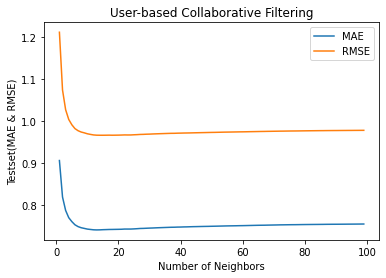

In [52]:
plt.plot(k1,ubc_nn_mae)
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('User-based Collaborative Filtering')
plt.show()

In [53]:
#Best K
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Best Value of K : ', k_ubc)
print('Minimum RMSE : ', min(ubc_nn_rmse))

Best Value of K :  15
Minimum RMSE :  0.9663589276453397


Item-Item Filtering

In [ ]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
 ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
 ibc_nn.fit(trainset)
 predictions = ibc_nn.test(testset)
 ibc_nn_mae.append(accuracy.mae(predictions))
 ibc_nn_rmse.append(accuracy.rmse(predictions))


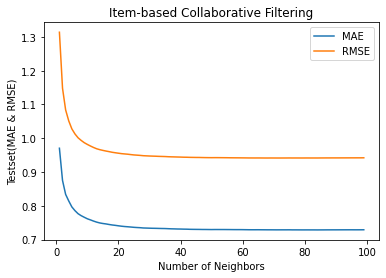

In [59]:
plt.plot(k1,ibc_nn_mae)
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('Item-based Collaborative Filtering')
plt.show()


In [60]:
#Best K
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Best Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))


Best Value of K :  68
Minimum RMSE :  0.941359509155313


## Conclusion
To begin with, recommender system is built with simple content-based filtering model. Secondly, memory-based model such
as item-based and user-based filtering system is built. There are few limitations in Memory-based CF. They are
computationally expensive and time consuming, yet recommendations are quite better than content-based filtering. To
overcome the latter limitations, Model-based recommender system is implemented which performs well by performing
dimension reduction. Also, this model performs well with user with no prior interactions on items. Hence, in real-time platforms
like Netflix, Amazon, model-based recommender system is deployed due to its fast performance ane generalized
recommendations.
